features = tensor([0.8158, 0.1542])
label = tensor([5.2997])
tensor([[ 1.9220, -1.0493],
        [-1.0119, -0.6578],
        [-1.0738,  0.6879],
        [ 0.1628,  0.6760],
        [-0.1500,  0.7467],
        [ 1.0005,  2.0965],
        [ 0.0131,  0.6019],
        [-0.6655,  0.1187],
        [ 0.3647, -0.5310],
        [-0.8218,  0.4446]])
tensor([[11.6239],
        [ 4.4215],
        [-0.2656],
        [ 2.2320],
        [ 1.3764],
        [-0.9483],
        [ 2.1816],
        [ 2.4676],
        [ 6.7299],
        [ 1.0436]])
epoch 1, loss 0.028763
epoch 2, loss 0.000101
epoch 3, loss 0.000052


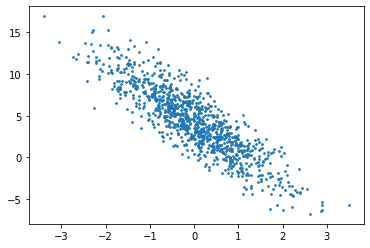

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
def linreg(X, w, b):
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print("features = {}\nlabel = {}".format(features[0], labels[0]))
d2l.plt.scatter(features[:, 1], labels, 3)

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print("{}\n{}".format(X, y))
    break

w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


In [2]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-0.0002, -0.0003], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0003], grad_fn=<RsubBackward1>)


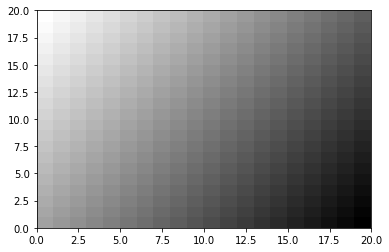

In [3]:
import matplotlib.pyplot as pyplot

xx = torch.zeros(800).reshape((400, 2))
yy = torch.zeros(400).reshape((20, 20))
num = 0
for i in range(0, 20, 1):
    for j in range(0, 20, 1):
        yy[i, j] = linreg(torch.tensor([float(i), float(j)]), true_w, true_b)
        num += 1
        
pyplot.gray()
pyplot.pcolor(yy)
#d2l.plt 로도 구현 가능.

In [ ]:
# torch는 matplotlib과의 연동이 매우 쉬운 것 같다. 한 번에 됨.